UNDERSTANDING THE DATASET

In [1]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
#Checking for Invalid Inputs in bmi and blood_glucose_level
null_bmi = df[df['bmi']< 0]
null_bmi

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [5]:
null_blood = df[df['blood_glucose_level'] < 0]
null_blood

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [6]:
(df[df["smoking_history"] == 'No Info']).count()

gender                 35816
age                    35816
hypertension           35816
heart_disease          35816
smoking_history        35816
bmi                    35816
HbA1c_level            35816
blood_glucose_level    35816
diabetes               35816
dtype: int64

In [7]:
df[df['HbA1c_level'] < 0]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,41.885915,0.074851,0.039420,27.320840,5.527505,138.057441,0.085001
std,22.516945,0.263152,0.194594,6.636776,1.070677,40.707868,0.278884
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: >

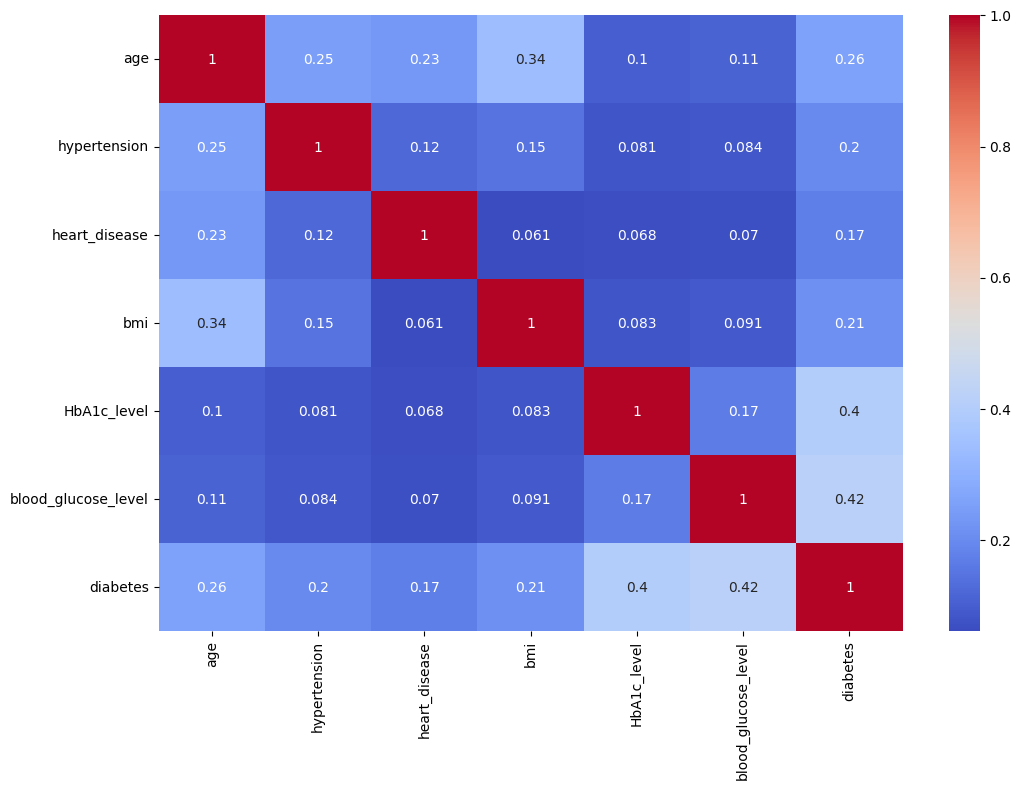

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['gender', 'smoking_history'], axis=1).corr(), annot=True, cmap='coolwarm')

In [10]:
df['diabetes'].value_counts()

diabetes
0    91499
1     8500
Name: count, dtype: int64

I undersampled my data, to make it balanced and also so that I'll be able to test all the algorithms I have in mind

In [11]:
# Separate the two classes
df_0 = df[df['diabetes'] == 0]
df_1 = df[df['diabetes'] == 1]
df_0_sampled = df_0.sample(n=1000, random_state=42)#1000 smaples from df_0
df_1_sampled = df_1.sample(n=1000, random_state=42)
# Combine them back into one DataFrame
df_balanced = pd.concat([df_0_sampled, df_1_sampled])
#Shuffling the rows of the dataFrame
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
df_balanced

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,1,1,No Info,25.60,7.5,300,1
1,Male,76.0,1,0,never,24.78,6.2,145,0
2,Female,68.0,1,0,not current,37.39,7.0,280,1
3,Male,27.0,0,0,No Info,27.32,6.6,160,0
4,Female,80.0,1,0,No Info,20.78,8.2,240,1
...,...,...,...,...,...,...,...,...,...
1995,Female,77.0,0,1,former,35.43,6.8,159,1
1996,Male,59.0,0,0,current,32.33,6.8,140,1
1997,Female,26.0,0,0,No Info,27.32,5.7,159,0
1998,Male,58.0,0,0,never,38.59,8.8,280,1


<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

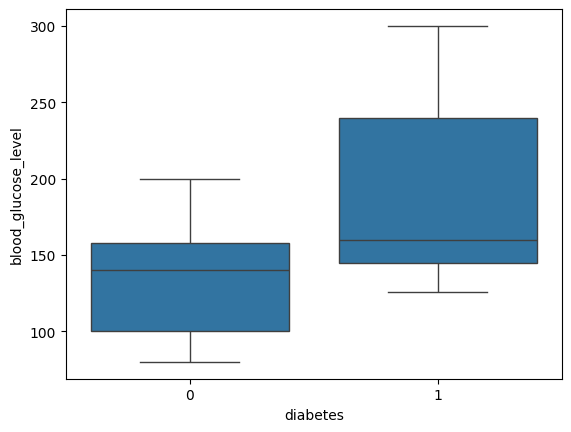

In [13]:
sns.boxplot(data=df_balanced, y='blood_glucose_level', x='diabetes')

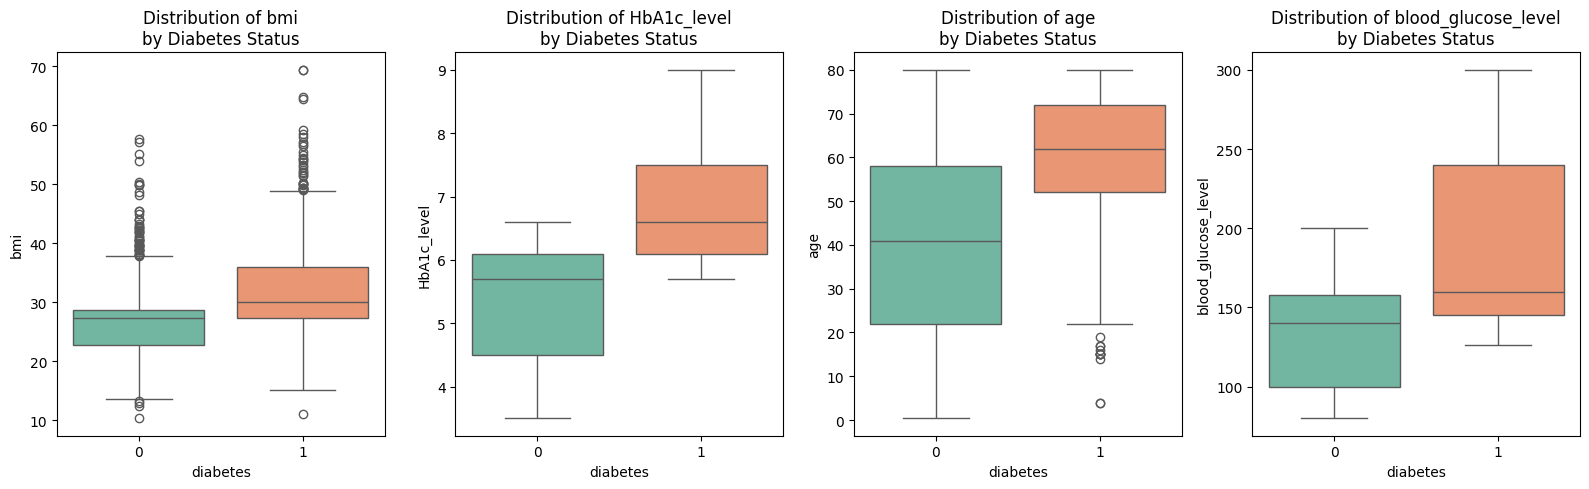

In [14]:
col_eval = ['bmi','HbA1c_level','age', 'blood_glucose_level']
n_col = len(col_eval)
fig, axes = plt.subplots(1,n_col, figsize=(16, 5))
for col, ax in zip(col_eval, axes):
    sns.boxplot(x='diabetes', y=col, data=df_balanced, ax=ax, palette="Set2", hue='diabetes', legend=False)
    ax.set_title(f'Distribution of {col}\nby Diabetes Status')
plt.tight_layout()    
    

In [15]:
(df_balanced[df_balanced["smoking_history"] == 'No Info']).count()


gender                 565
age                    565
hypertension           565
heart_disease          565
smoking_history        565
bmi                    565
HbA1c_level            565
blood_glucose_level    565
diabetes               565
dtype: int64

Text(0, 0.5, 'Proportion (1.0 = 100%)')

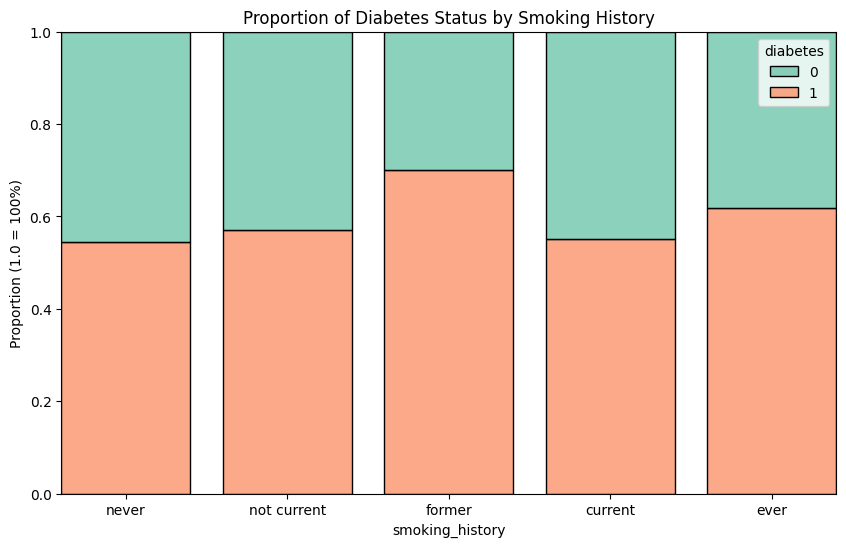

In [16]:
df_smoking_plot = df_balanced[df_balanced['smoking_history'] != 'No Info'].copy()
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_smoking_plot,
    x='smoking_history',
    hue='diabetes',
    multiple='fill', 
    palette='Set2',
    shrink=0.8
)

plt.title('Proportion of Diabetes Status by Smoking History')
plt.ylabel('Proportion (1.0 = 100%)') 

Text(0, 0.5, 'Count')

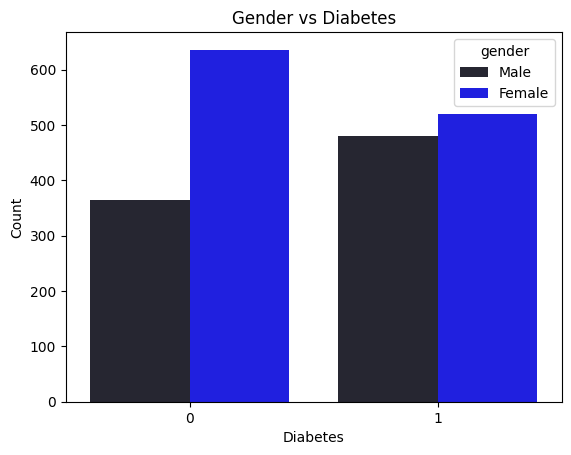

In [17]:
sns.countplot(data=df_balanced, x='diabetes', hue='gender', color='blue', palette='dark:blue')
plt.title("Gender vs Diabetes")
plt.xlabel('Diabetes')
plt.ylabel('Count')

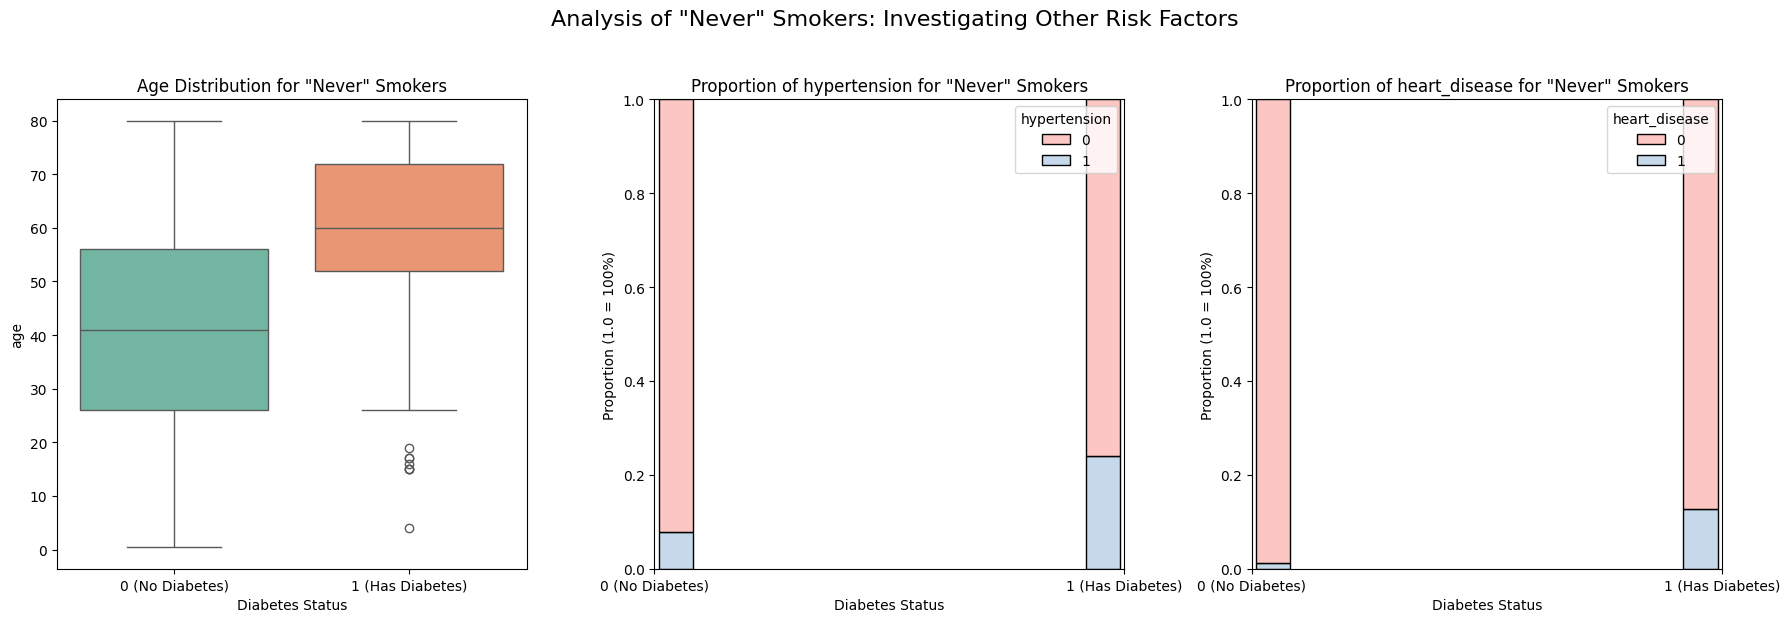

In [18]:
df_never_smokers = df_smoking_plot[df_smoking_plot['smoking_history'] == 'never'].copy()
cols_to_check = ['age', 'hypertension', 'heart_disease']
n_cols = len(cols_to_check)
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(18, 6))

for col, ax in zip(cols_to_check, axes):
    
    if col == 'age':
        sns.boxplot(
            data=df_never_smokers, 
            x='diabetes', 
            y='age', 
            hue='diabetes',  
            palette='Set2', 
            ax=ax
        )
        ax.set_title(f'Age Distribution for "Never" Smokers', fontsize=12)
        ax.set_xlabel('Diabetes Status')
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['0 (No Diabetes)', '1 (Has Diabetes)'])
        ax.legend_.remove() 
        
    else:
        sns.histplot(
            data=df_never_smokers,
            x='diabetes',
            hue=col,
            multiple='fill',
            shrink=0.8,
            ax=ax,
            palette='Pastel1' 
        )
        ax.set_title(f'Proportion of {col} for "Never" Smokers', fontsize=12)
        ax.set_xlabel('Diabetes Status')
        ax.set_ylabel('Proportion (1.0 = 100%)')
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['0 (No Diabetes)', '1 (Has Diabetes)'])

# Overall title for the figure
fig.suptitle('Analysis of "Never" Smokers: Investigating Other Risk Factors', fontsize=16, y=1.03)
plt.tight_layout()

In [19]:
n = df_never_smokers.drop(['gender', 'smoking_history'], axis=1).corr()

<Axes: >

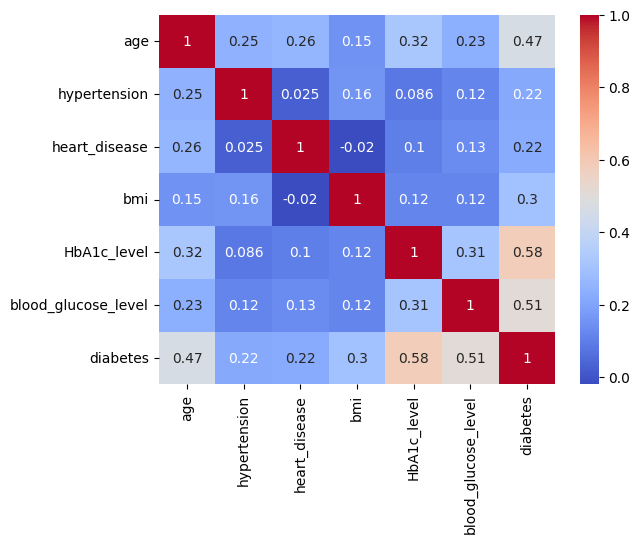

In [20]:
sns.heatmap(n, annot=True, cmap='coolwarm')

In [21]:
df_balanced.to_csv("diabetesbal.csv")